<a href="https://colab.research.google.com/github/ibribr/DT8807/blob/master/Mnist_RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from keras.datasets.mnist import load_data
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from IPython.display import Image, display   # display model image file inline

In [3]:
(xtrain, ytrain), (xtest, ytest) = load_data()
xtrain = xtrain.astype('float32') /255.0
xtest = xtest.astype('float32') /255.0
xtrain = xtrain.reshape(60000,28*28)  #28*28
xtest = xtest.reshape(10000, 28*28)

print(ytrain)
ytrain=to_categorical(ytrain)
ytest =to_categorical(ytest)

print(ytrain)

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

[5 0 4 ... 5 6 8]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [4]:
# Training Parameters
learning_rate = 0.001
training_steps = 10000
batch_size = 128
display_step = 200

# Network Parameters
num_input = 28 # MNIST data input (img shape: 28*28)
timesteps = 28 # timesteps
num_hidden = 128 # hidden layer num of features
num_classes = 10 # MNIST total classes (0-9 digits)

# reshape the inputs
xtrain = np.reshape(xtrain, [xtrain.shape[0], timesteps, num_input])
xtest = np.reshape(xtest, [xtest.shape[0], timesteps, num_input])
#ytest = np.reshape(ytest, [ytest.shape[0], num_classes])
print(xtrain.shape)

# bulid model
model = Sequential()
model.add(LSTM(num_hidden, input_shape=(timesteps, num_input), activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(num_hidden, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))


(60000, 28, 28)


In [ ]:
opt = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-5)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) #'sparse_categorical_crossentropy'
print(model.summary())
plot_model(model, to_file='LSTM-mnist.png', show_shapes=True, show_layer_names=True)
Image('LSTM-mnist.png')

history = model.fit(xtrain, ytrain, epochs=10, batch_size=batch_size, verbose=1, validation_data=(xtest, ytest))


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
0.05469215027987957
Training and validation loss    :  0.05469215027987957 0.05260170921683312
Training and validation accuracy:  0.9850066721439361 0.9855200052261353
313/313 [==============================] - 3s 9ms/step - loss: 0.0446 - accuracy: 0.9875
accuracy : [0.04458482190966606, 0.987500011920929]


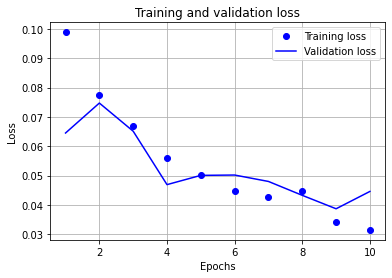

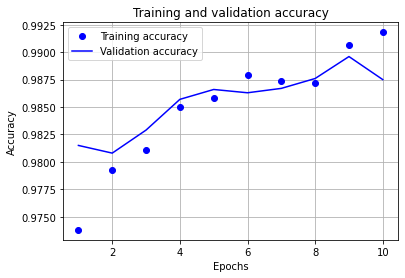

In [12]:
print(history.history.keys())
loss = history.history['loss']
print(np.mean(loss))
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

print('Training and validation loss    : ', np.mean(loss), np.mean(val_loss))
print('Training and validation accuracy: ', np.mean(accuracy), np.mean(val_accuracy))

y_pred = model.predict(xtest)
score = model.evaluate(xtest, ytest)
print('accuracy :', score)

epochs = range(1, len(loss)+1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

Precision score: 0.984778066910591
Recall score   : 0.9841811784813718
Confusion Matrix
[[ 972    0    0    1    1    1    1    1    3    0]
 [   0 1133    1    0    0    0    1    0    0    0]
 [   2    2 1023    0    1    0    2    2    0    0]
 [   0    5    5  992    0    3    0    5    0    0]
 [   0    2    0    0  973    0    2    2    0    3]
 [   0    5    2    3    0  877    1    0    4    0]
 [   6    3    0    0    3    0  945    0    1    0]
 [   0    4    7    0    0    0    0 1013    0    4]
 [   2    4   10    1    5    1    2    4  941    4]
 [   0    5    0    0   17    2    1    7    2  975]]


<Figure size 432x288 with 0 Axes>

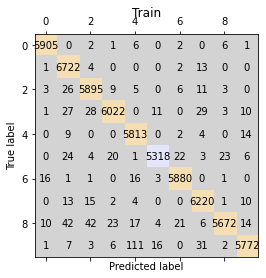

<Figure size 432x288 with 0 Axes>

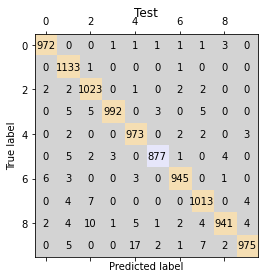

In [55]:
ypred = model.predict(xtest)

predicted_labels = np.argmax(ypred, axis=-1)
actual_labels = np.argmax(ytest, axis=-1)

print('Precision score:', precision_score(actual_labels, predicted_labels, average='macro'))
print('Recall score   :', recall_score(actual_labels, predicted_labels, average='macro'))


print('Confusion Matrix')
print(confusion_matrix(ytest.argmax(1), ypred.argmax(1)))

cmap = ListedColormap(['lightgrey', 'silver', 'ghostwhite', 'lavender', 'wheat'])

#confusion matrix
def cm(ytest, ypred, title):
  cm = confusion_matrix(ytest, ypred)

  plt.figure()
  plt.matshow(cm, cmap=cmap)
  
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      plt.text(x=j, y=i, s=cm[i,j], va='center', ha='center')
  
  plt.title(title)
  plt.xlabel('Predicted label')
  plt.ylabel('True label')
  plt.show()

cm(ytrain.argmax(1), model.predict(xtrain).argmax(1), title='Train')
cm(ytest.argmax(1), model.predict(xtest).argmax(1), title='Test')